# Day 2
batch size 256 lr 1e-3, normed weighted

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
classTrainFeatures = basic_features
classModel = 'modelSwish'
varSet = "basic_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.362s 


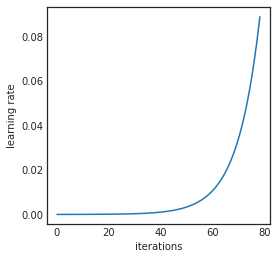

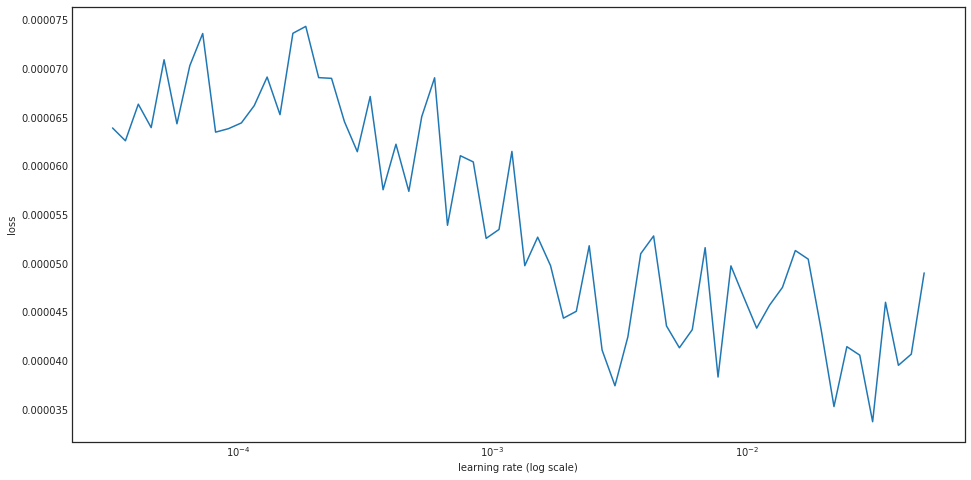

______________________________________



In [9]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [10]:
compileArgs['lr'] = 1e-3

## Train classifier

In [ ]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=50, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode



/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158277). Check your callbacks.
  % delta_t_median)


1 New best found: 4.27555195541e-05
2 New best found: 3.84180455384e-05
3 New best found: 3.68978217742e-05
4 New best found: 3.60291505152e-05
5 New best found: 3.48953782421e-05
6 New best found: 3.44521093852e-05
7 New best found: 3.44194341525e-05
9 New best found: 3.41729660353e-05
10 New best found: 3.39498626354e-05
11 New best found: 3.37710518498e-05
12 New best found: 3.33669297009e-05
13 New best found: 3.30322463099e-05
14 New best found: 3.29949701999e-05
15 New best found: 3.29858534195e-05
20 New best found: 3.28980661415e-05
22 New best found: 3.2686258168e-05
23 New best found: 3.24880809172e-05
27 New best found: 3.23703675633e-05
28 New best found: 3.23073669069e-05
30 New best found: 3.23024885884e-05
31 New best found: 3.22931971347e-05
48 New best found: 3.22905229872e-05
49 New best found: 3.20795570761e-05
50 New best found: 3.20593026931e-05
56 New best found: 3.20421610891e-05
57 New best found: 3.19925218005e-05
58 New best found: 3.19312332423e-05
59 New bes

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180965). Check your callbacks.
  % delta_t_median)


1 New best found: 4.42835749454e-05
2 New best found: 3.75652172097e-05
3 New best found: 3.66607089112e-05
4 New best found: 3.64837267064e-05
5 New best found: 3.50747488015e-05
6 New best found: 3.46848734402e-05
7 New best found: 3.46411793184e-05
8 New best found: 3.45519840661e-05
10 New best found: 3.45254052125e-05
11 New best found: 3.39834451587e-05
12 New best found: 3.38840485007e-05
13 New best found: 3.36982079644e-05
14 New best found: 3.36828210117e-05
15 New best found: 3.3674837489e-05
22 New best found: 3.36036820835e-05
23 New best found: 3.33817823427e-05
24 New best found: 3.33676452941e-05
26 New best found: 3.32693506755e-05
27 New best found: 3.31063628747e-05
31 New best found: 3.31059976871e-05
45 New best found: 3.30364463202e-05
48 New best found: 3.30121994446e-05
49 New best found: 3.28532437876e-05
53 New best found: 3.28380627399e-05
54 New best found: 3.27809096913e-05
58 New best found: 3.27529747307e-05
93 New best found: 3.27195149897e-05
94 New bes

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161646). Check your callbacks.
  % delta_t_median)


1 New best found: 4.21391931924e-05
2 New best found: 3.78978599647e-05
3 New best found: 3.65902310988e-05
4 New best found: 3.56255743633e-05
5 New best found: 3.53205496874e-05
6 New best found: 3.42386976914e-05
7 New best found: 3.4171258617e-05
10 New best found: 3.40727240404e-05
11 New best found: 3.35476354703e-05
12 New best found: 3.34600631405e-05
13 New best found: 3.33070980435e-05
14 New best found: 3.32750343354e-05
15 New best found: 3.32471154971e-05
20 New best found: 3.32259339663e-05
22 New best found: 3.30583397799e-05
24 New best found: 3.29914607922e-05
25 New best found: 3.26837589965e-05
28 New best found: 3.26058685486e-05
29 New best found: 3.2583041177e-05


## Construct ensemble

In [ ]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [ ]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

## Response on development data

In [ ]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

In [ ]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

## Response on val data

In [ ]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

In [ ]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

## Evaluation

### Import in dataframe

In [ ]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [ ]:
valData = convertToDF(valData)

In [ ]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### MVA distributions

In [ ]:
getClassPredPlot([valData[bkgVal], valData[sigVal]], weightName='gen_weight')

In [ ]:
amsScan(valData)

In [ ]:
def scoreTest(ensemble, weights, features, cut, name):
    testData = pandas.read_csv('../Data/test.csv')
    with open(dirLoc + 'inputPipe.pkl', 'r') as fin:
        inputPipe = pickle.load(fin)

    testData['pred_class'] = ensemblePredict(inputPipe.transform(testData[features].values.astype('float32')), ensemble, weights)    	

    testData['Class'] = 'b'
    testData.loc[testData.pred_class >= cut, 'Class'] = 's'

    testData.sort_values(by=['pred_class'], inplace=True)
    testData['RankOrder']=range(1, len(testData)+1)
    testData.sort_values(by=['EventId'], inplace=True)

    testData.to_csv(dirLoc + name + '_test.csv', columns=['EventId', 'RankOrder', 'Class'], index=False)

In [ ]:
scoreTest(ensemble, weights, classTrainFeatures, 0.24044741690158844, 'Day_2_Basic_Features_256_1e-3_swish_mult2_200E_normedweighted')